# Question-1 : Intel Image Classification

# Problem Statement

<p>
Intel Corporation is interested in developing an image classification system to enhance their various products and services. 

They have collected a diverse dataset of images containing various objects, scenes, and objects related to their products. 

The goal is to create an image classification model that can accurately categorize these images into predefined classes or labels </p>

# Expected Outcome/Output

<p>
The expected outcome or output of the Intel Image Classification is a well-trained deep learning model capable of classifying new images accurately
</p>

# Dataset Description

- This image data set focuses on natural scenes.

- It was created by Intel for an image classification competition. 

- Approximately 25,000 images are there in the dataset.Images are grouped 
into categories such as buildings, forests, glaciers, mountains, seas,
and streets.

- Dataset is divided into folders for training, testing, and prediction:

    - 14,000 training images

    - 3,000 validation images
    
    - 7,000 test images

Dataset Link: https://www.kaggle.com/puneet6060/intel-image-classification

# Methodology
- Data Preprocessing: Prepare the dataset by resizing images

- Training: Train the model on the prepared dataset using appropriate training techniques, loss functions, and optimization algorithms.

- Making models with different architectures: Make models with different architectures and compare their performance, also comparing ANN and CNN models.

- Evaluation: Evaluate the model's performance using various metrics such as accuracy.

### Importing the required libraries

In [2]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [35]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory):
        if labels == 'glacier':
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+image_file)
            image = cv2.resize(image,(150,150))
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462)

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]


In [4]:
Images, Labels = get_images('Intel Image data/seg_train/seg_train/')

Images = np.array(Images)
Labels = np.array(Labels)

In [10]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


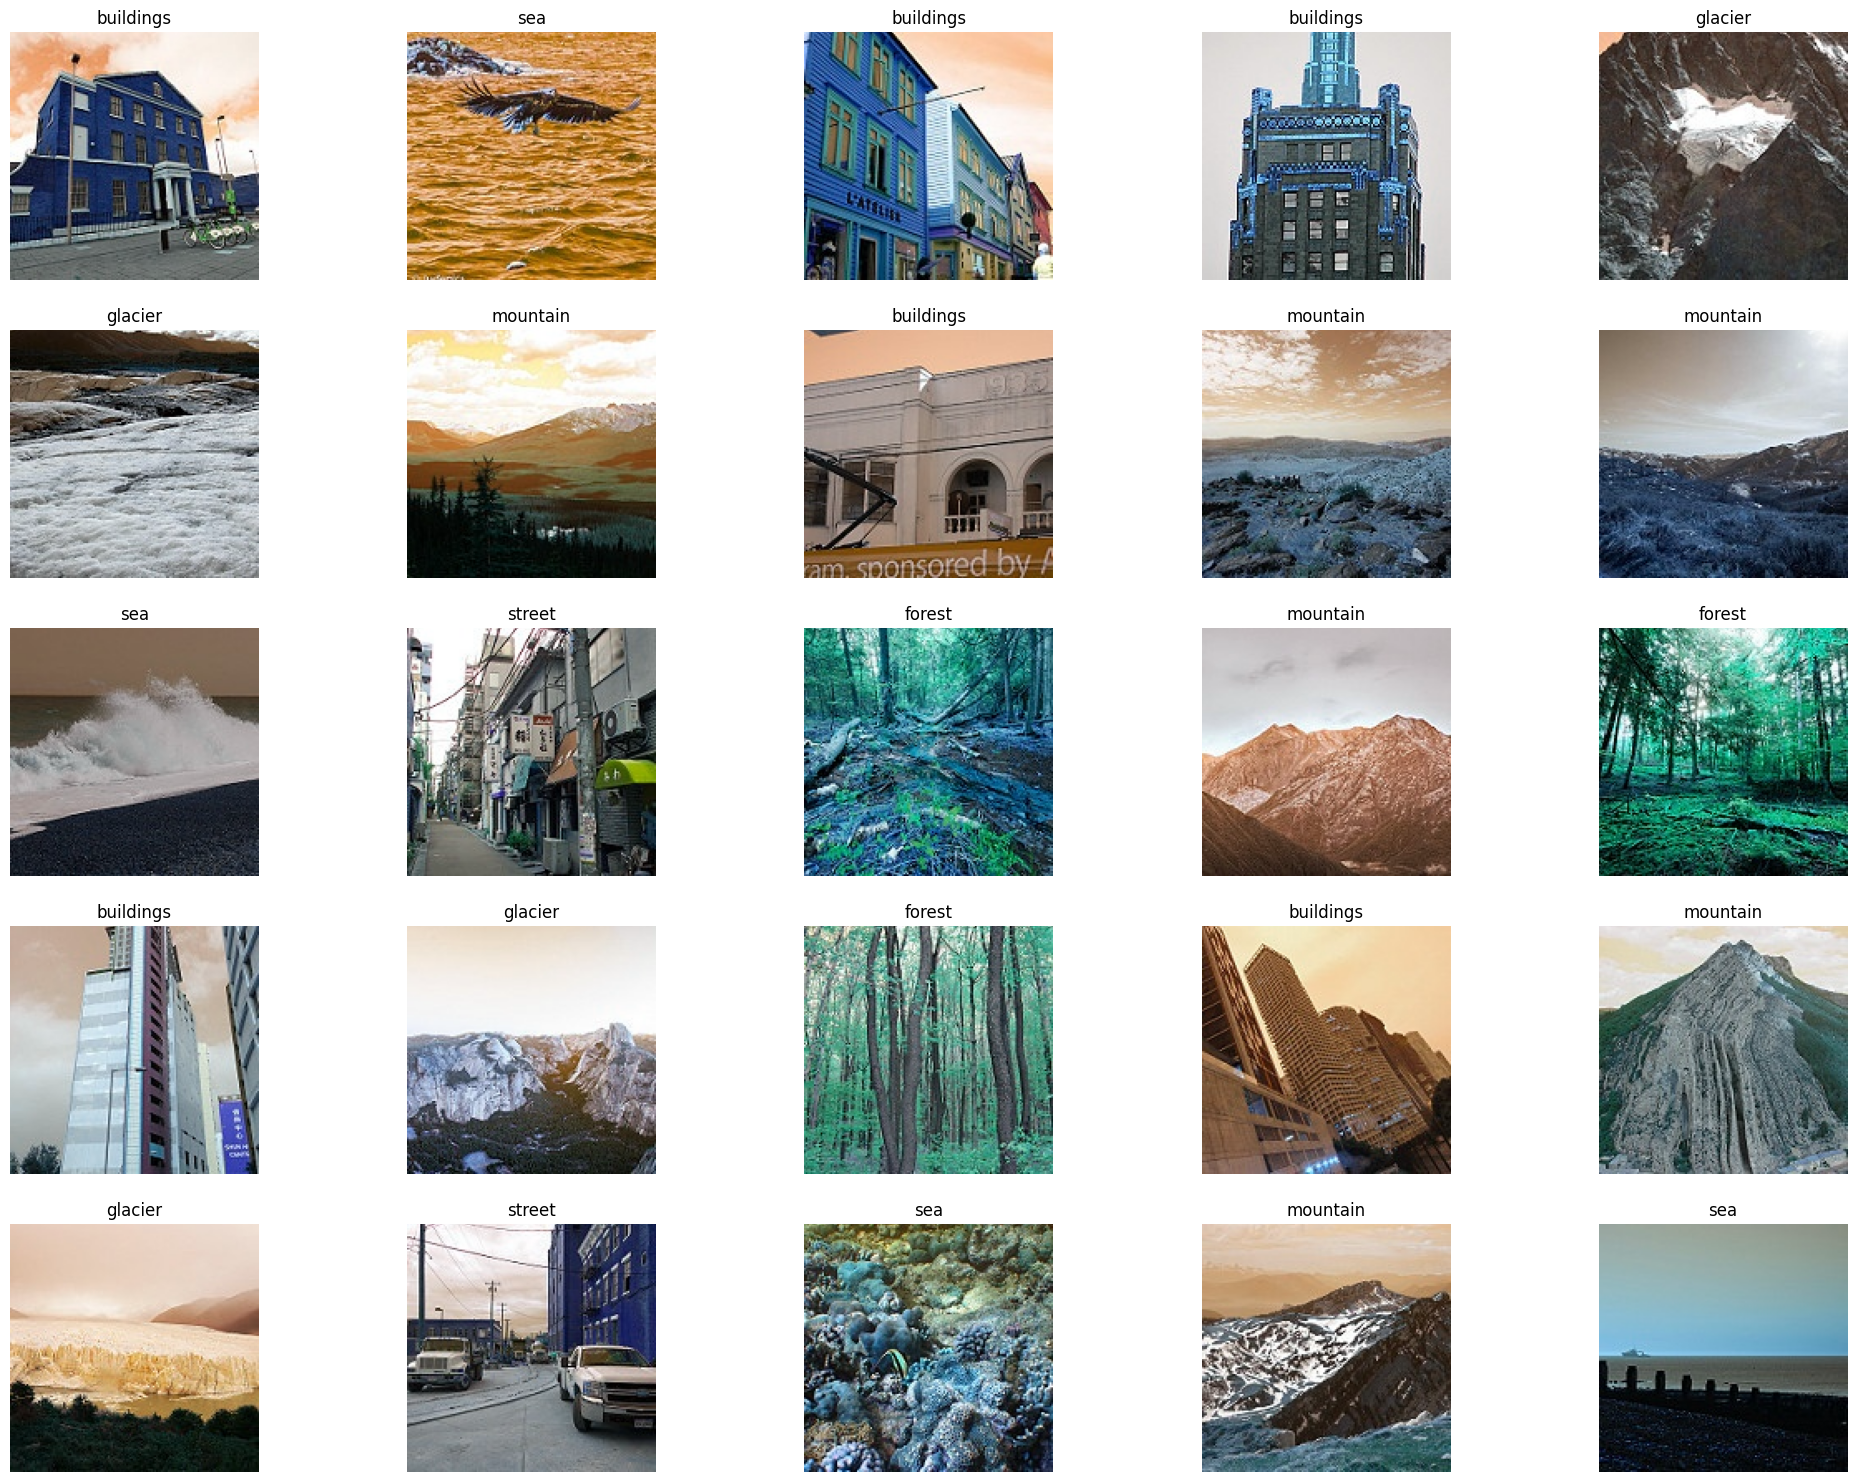

In [11]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

# Builing an Artificial Neural Network Model

In [13]:
Images = np.array(Images)
Labels = np.array(Labels)

In [14]:
label_encoder = LabelEncoder()
Labels_encoded = label_encoder.fit_transform(Labels)
num_classes = len(label_encoder.classes_)

In [15]:
train_images, test_images, train_labels, test_labels = train_test_split(
    Images, Labels_encoded, test_size=0.2, random_state=42)

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
image_height, image_width, num_channels = Images.shape[1], Images.shape[2], Images.shape[3]

## Making a model with 2 hidden layers

In [18]:
ann_model = Sequential([
    layers.Flatten(input_shape=(image_height, image_width, num_channels)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [19]:
ann_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
ann_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

2023-09-23 00:17:58.538591: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
281/281 [==============================] - 150s 490ms/step - loss: 2.9195 - accuracy: 0.3712 - val_loss: 1.7764 - val_accuracy: 0.4065
Epoch 2/10
281/281 [==============================] - 9s 32ms/step - loss: 1.6678 - accuracy: 0.4351 - val_loss: 1.7705 - val_accuracy: 0.3958
Epoch 3/10
281/281 [==============================] - 9s 32ms/step - loss: 1.5349 - accuracy: 0.4591 - val_loss: 1.4116 - val_accuracy: 0.4457
Epoch 4/10
281/281 [==============================] - 11s 38ms/step - loss: 1.3274 - accuracy: 0.4950 - val_loss: 1.2683 - val_accuracy: 0.5196
Epoch 5/10
281/281 [==============================] - 10s 37ms/step - loss: 1.2561 - accuracy: 0.5267 - val_loss: 1.3105 - val_accuracy: 0.5022
Epoch 6/10
281/281 [==============================] - 11s 38ms/step - loss: 1.2469 - accuracy: 0.5310 - val_loss: 1.2649 - val_accuracy: 0.5218
Epoch 7/10
281/281 [==============================] - 11s 38ms/step - loss: 1.2131 - accuracy: 0.5396 - val_loss: 1.1955 - val_accuracy:

In [21]:
test_loss, test_accuracy = ann_model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

88/88 [==============================] - 2s 25ms/step - loss: 1.3731 - accuracy: 0.5084
Test Loss: 1.3731242418289185
Test Accuracy: 0.5083719491958618


## Making a model with 3 hidden layers

In [22]:
ann_model_2 = Sequential([
    layers.Flatten(input_shape=(image_height, image_width, num_channels)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [23]:
ann_model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
ann_model_2.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
281/281 [==============================] - 33s 102ms/step - loss: 2.7119 - accuracy: 0.3759 - val_loss: 1.5551 - val_accuracy: 0.4390
Epoch 2/10
281/281 [==============================] - 10s 34ms/step - loss: 1.5323 - accuracy: 0.4546 - val_loss: 1.3674 - val_accuracy: 0.4920
Epoch 3/10
281/281 [==============================] - 11s 39ms/step - loss: 1.3818 - accuracy: 0.4906 - val_loss: 1.7582 - val_accuracy: 0.4270
Epoch 4/10
281/281 [==============================] - 11s 38ms/step - loss: 1.2595 - accuracy: 0.5271 - val_loss: 1.3601 - val_accuracy: 0.4773
Epoch 5/10
281/281 [==============================] - 12s 42ms/step - loss: 1.2243 - accuracy: 0.5388 - val_loss: 1.2232 - val_accuracy: 0.5436
Epoch 6/10
281/281 [==============================] - 11s 40ms/step - loss: 1.1851 - accuracy: 0.5543 - val_loss: 1.2690 - val_accuracy: 0.5280
Epoch 7/10
281/281 [==============================] - 11s 38ms/step - loss: 1.1486 - accuracy: 0.5668 - val_loss: 1.2523 - val_accuracy

In [25]:
test_loss, test_accuracy = ann_model_2.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

88/88 [==============================] - 3s 28ms/step - loss: 1.2498 - accuracy: 0.5383
Test Loss: 1.249780297279358
Test Accuracy: 0.5382971167564392


# Builing a Convolutional Neural Network Model

In [7]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

In [5]:
Images, Labels = get_images('Intel Image data/seg_train/seg_train/')

Images = np.array(Images)
Labels = np.array(Labels)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

trained = model.fit(Images, Labels, epochs=10, validation_split=0.30, callbacks=[early_stopping])

Epoch 1/10


2023-09-23 00:42:07.039199: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x50xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x50xi1>'


306/307 [============================>.] - ETA: 1s - loss: 1.5449 - accuracy: 0.4086

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x31x1x50xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x31x1x50xi1>'


307/307 [==============================] - 447s 1s/step - loss: 1.5430 - accuracy: 0.4090 - val_loss: 1.0547 - val_accuracy: 0.5790
Epoch 2/10
307/307 [==============================] - 457s 1s/step - loss: 1.0949 - accuracy: 0.5612 - val_loss: 1.0074 - val_accuracy: 0.6312
Epoch 3/10
307/307 [==============================] - 406s 1s/step - loss: 0.9689 - accuracy: 0.6209 - val_loss: 0.8741 - val_accuracy: 0.6578
Epoch 4/10
307/307 [==============================] - 417s 1s/step - loss: 0.8672 - accuracy: 0.6734 - val_loss: 0.7380 - val_accuracy: 0.7160
Epoch 5/10
307/307 [==============================] - 418s 1s/step - loss: 0.8034 - accuracy: 0.7000 - val_loss: 0.7777 - val_accuracy: 0.6963
Epoch 6/10
307/307 [==============================] - 415s 1s/step - loss: 0.7491 - accuracy: 0.7355 - val_loss: 0.6874 - val_accuracy: 0.7509
Epoch 7/10
307/307 [==============================] - 562s 2s/step - loss: 0.6906 - accuracy: 0.7511 - val_loss: 0.6576 - val_accuracy: 0.7628
Epoch 8/10

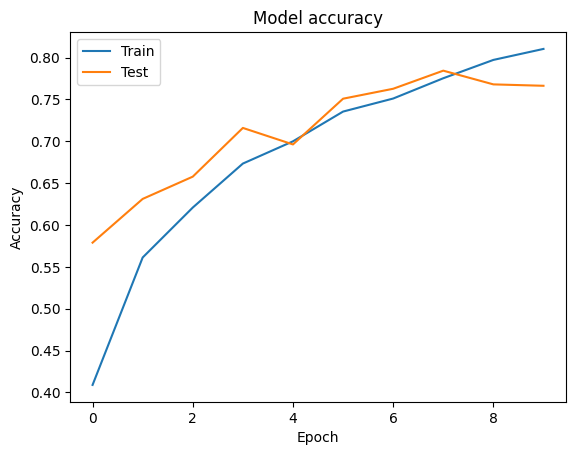

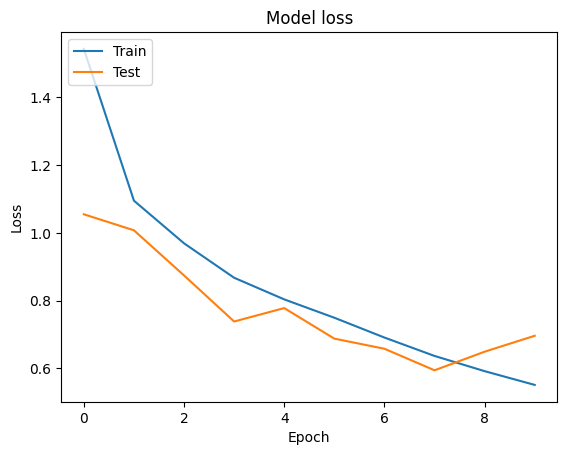

In [10]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [11]:
test_images,test_labels = get_images('Intel Image data/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 28s 292ms/step - loss: 0.7059 - accuracy: 0.7603


[0.7058967351913452, 0.7603333592414856]

In [37]:
pred_images,no_labels = get_images('Intel Image data/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

1/1 [==============================] - 0s 14ms/step


/var/folders/nb/r9gyvv_j43g84svjgsw5sg_00000gn/T/ipykernel_5408/304095857.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


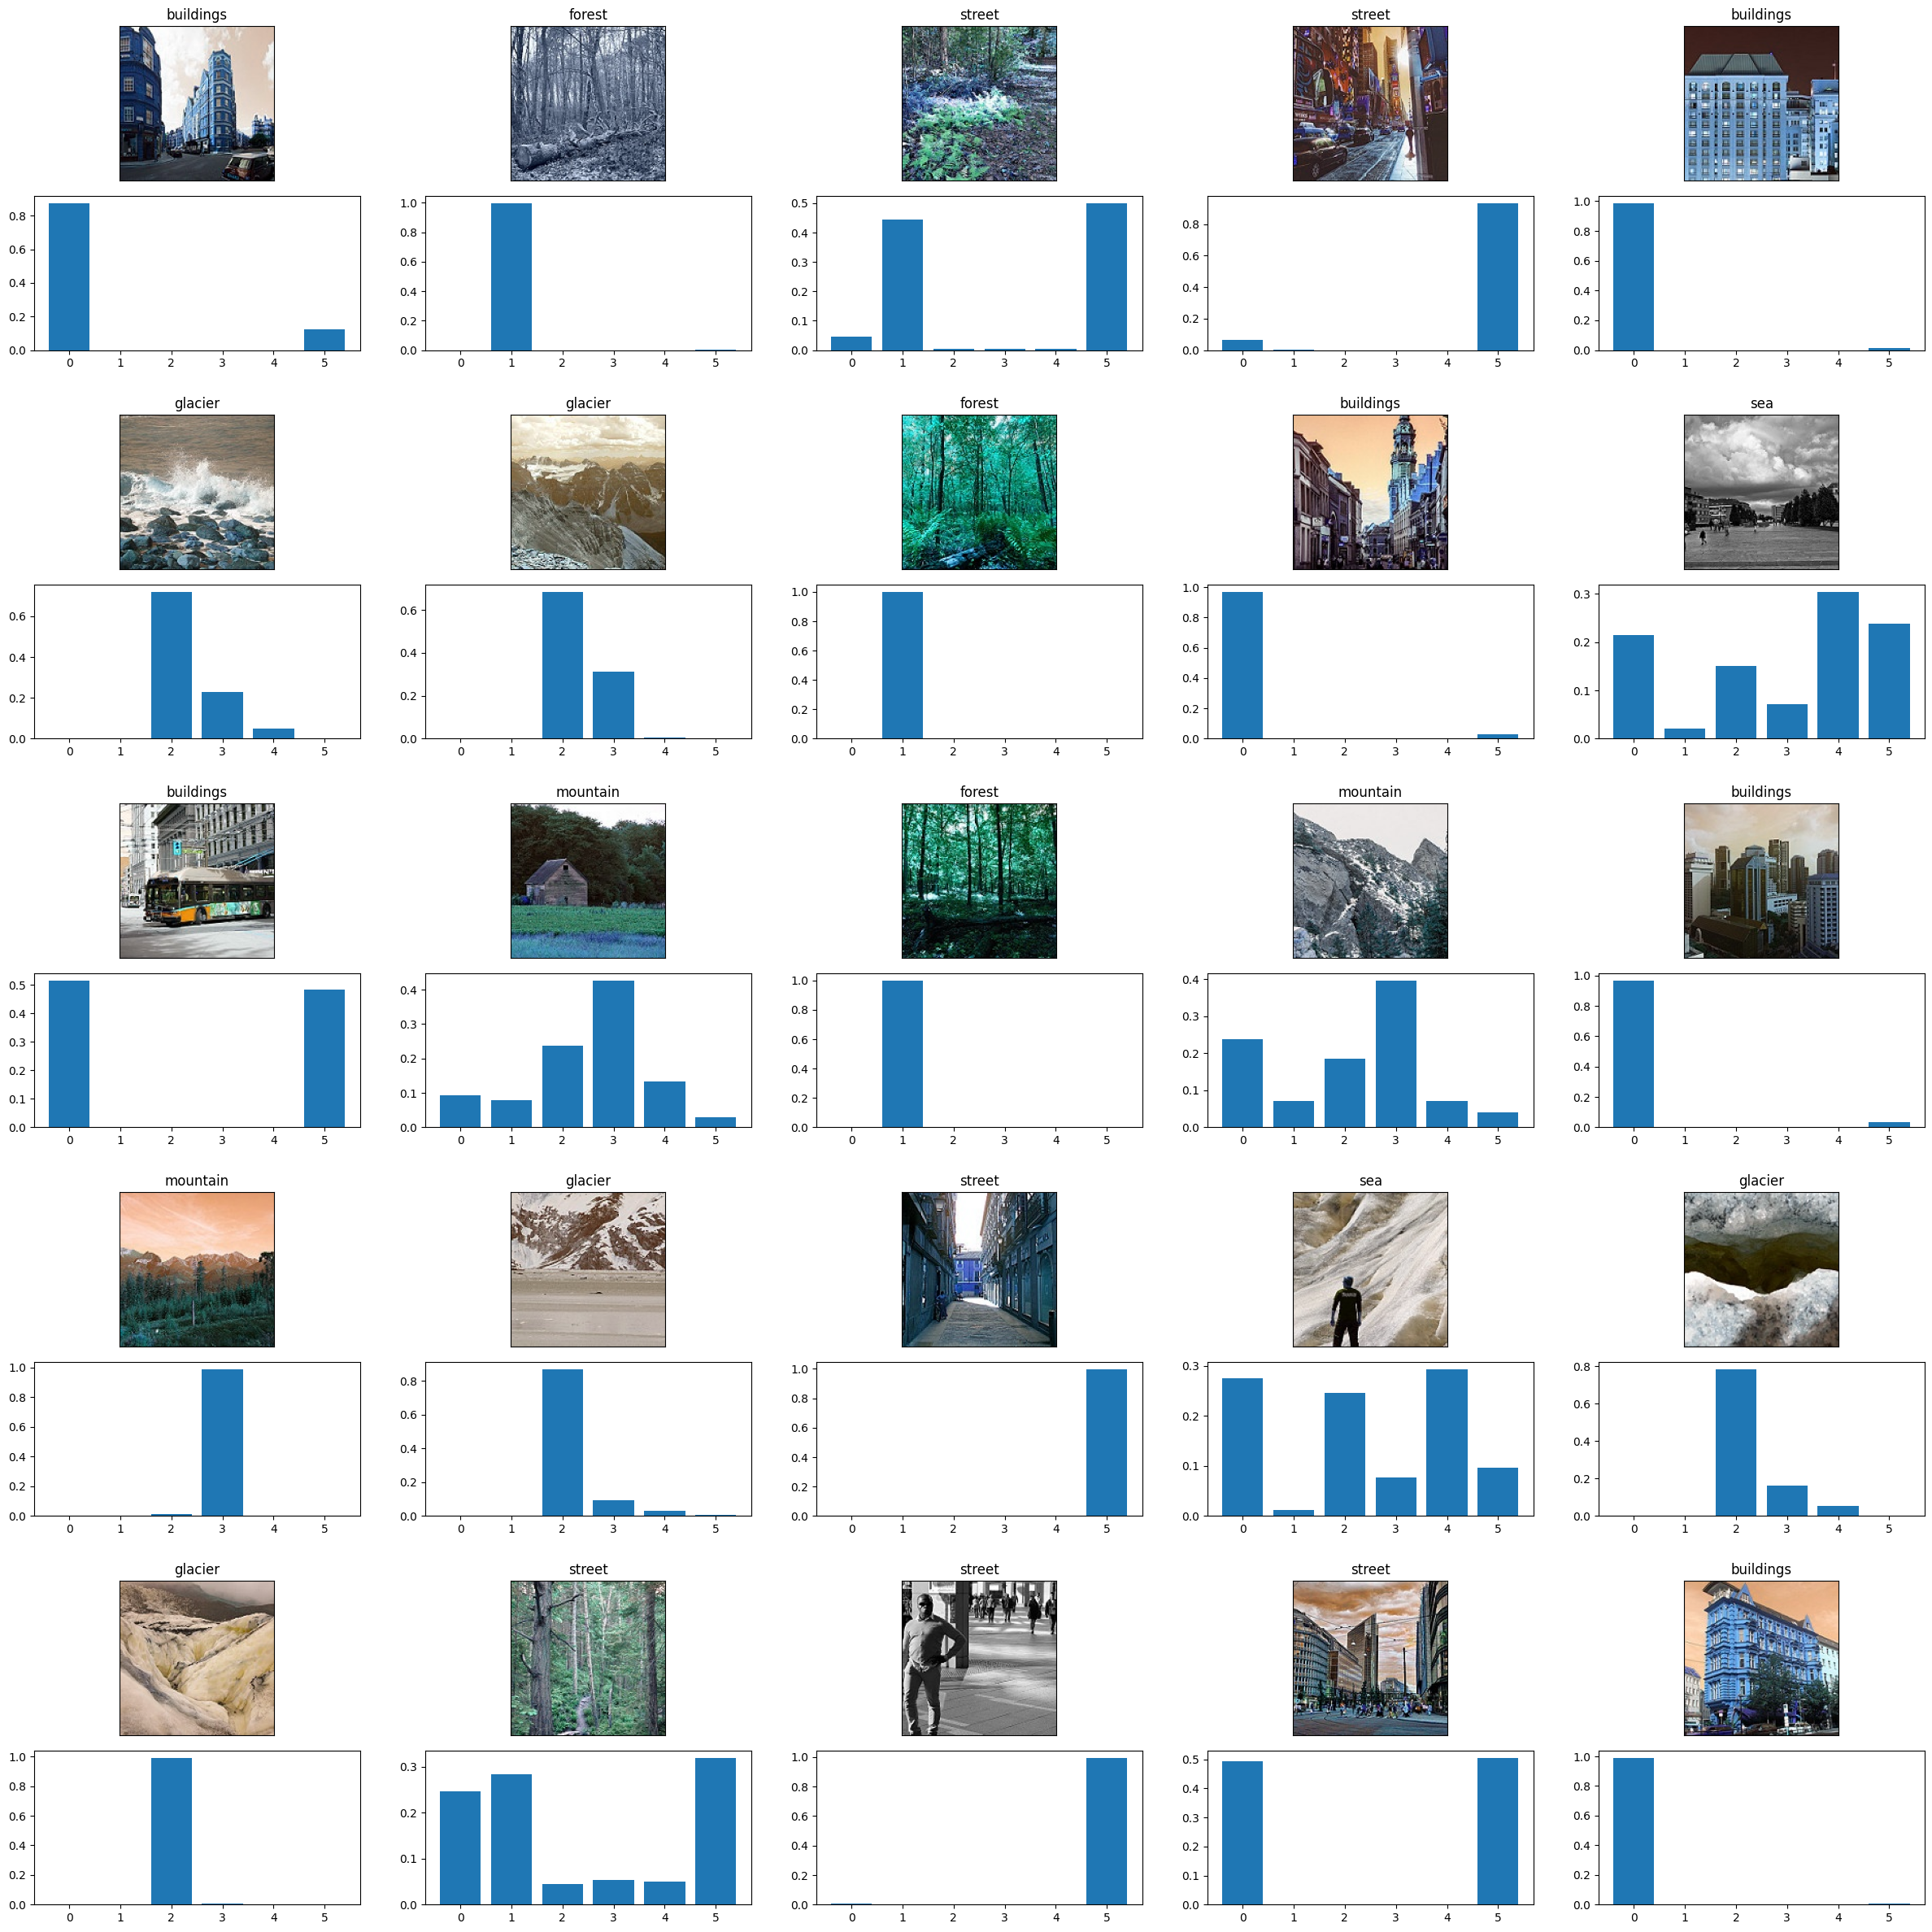

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0, len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    
    # Use model.predict to get class probabilities
    pred_prob = model.predict(pred_image).reshape(6)
    
    # Find the class with the highest probability
    pred_class = get_classlabel(np.argmax(pred_prob))
    
    for j in range(2):
        if (j % 2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0, 1, 2, 3, 4, 5], pred_prob)
            fig.add_subplot(ax)

fig.show()

# Conclusion

In this problem statement, we have built an image classification model on intel images using ANN and CNN. We have also compared the performance of both the models. We have also built models with different architectures and compared their performance. We have also compared the performance of ANN and CNN models.

# Question-2: Concrete Crack Image Classification

# Problem Statement

The goal of this problem is to develop a binary image classification model that can accurately distinguish between concrete images with cracks and concrete images without cracks.

# Expected Outcome/Output

<p>
The expected outcome or output of the Concrete Crack Image Classification is a well-trained deep learning model capable of classifying new concrete images accurately
</p>

# Dataset Description

- The dataset contains 40,000 images.

- There are 20,000 images in the "positive" class (cracked concrete) and 20,000 images in the "negative" class (non-cracked concrete).

- Each image has a resolution of 227 x 227 pixels with RGB channels.

- The dataset is generated from 458 high-resolution images (4032x3024 pixels) with the method proposed by Zhang et al (2016).

Dataset Link: https://www.kaggle.com/arunrk7/surface-crack-detection

# Methodology
- Data Preprocessing: Prepare the dataset by resizing images

- Training: Train the model on the prepared dataset using appropriate training techniques, loss functions, and optimization algorithms.

- Making models with different architectures: Make models with different architectures and compare their performance, also comparing ANN and CNN models.

- Evaluation: Evaluate the model's performance using various metrics such as accuracy.

# Importing the required libraries

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import splitfolders

%matplotlib inline

In [48]:
splitfolders.ratio('concrete crack detection', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 40000 files [00:31, 1271.65 files/s]


In [49]:
BATCH = 26
IMG_WIDTH = 96
IMG_HEIGHT = 96

In [50]:
train_loader = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

test_loader = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

validation_loader = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

Found 32000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [51]:
class_names = train_loader.class_names
print(class_names)

['Negative', 'Positive']


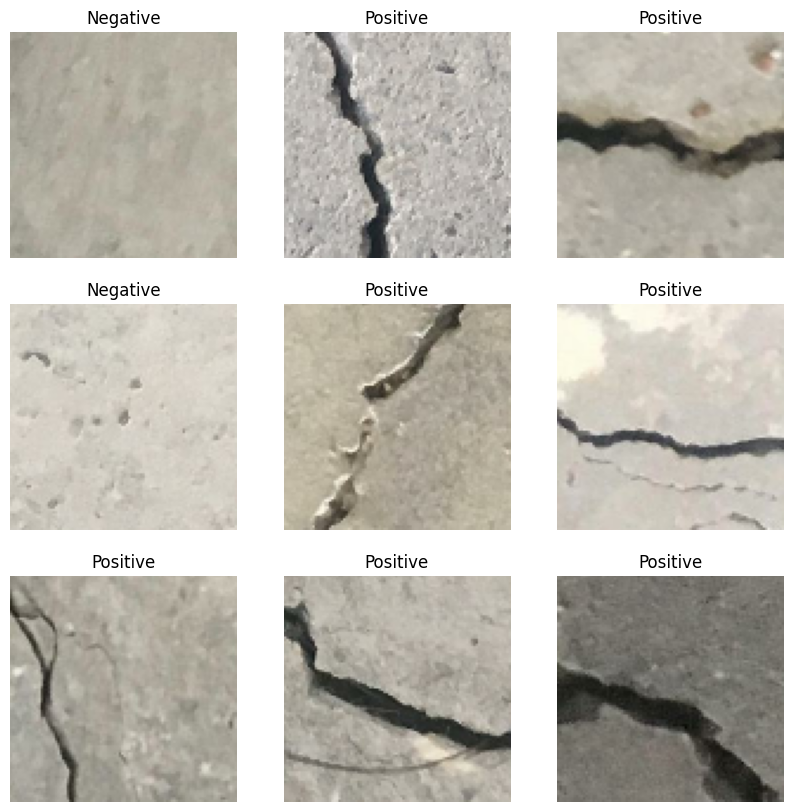

In [52]:
plt.figure(figsize=(10, 10))
for images, labels in train_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Builing an Artificial Neural Network Model

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Making a model with 2 hidden layers

In [65]:
model = keras.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [66]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(train_loader, epochs=50, validation_data=validation_loader,callbacks=[early_stopping])

Epoch 1/50


1231/1231 [==============================] - 38s 31ms/step - loss: 91.4074 - accuracy: 0.7620 - val_loss: 39.6063 - val_accuracy: 0.7590
Epoch 2/50
1231/1231 [==============================] - 32s 26ms/step - loss: 26.5195 - accuracy: 0.7727 - val_loss: 0.8446 - val_accuracy: 0.8932
Epoch 3/50
1231/1231 [==============================] - 29s 23ms/step - loss: 1.7814 - accuracy: 0.6995 - val_loss: 0.7278 - val_accuracy: 0.5000
Epoch 4/50
1231/1231 [==============================] - 36s 29ms/step - loss: 1.5977 - accuracy: 0.5008 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 5/50
1231/1231 [==============================] - 32s 26ms/step - loss: 0.6942 - accuracy: 0.5015 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 6/50
1231/1231 [==============================] - 32s 26ms/step - loss: 0.6936 - accuracy: 0.4983 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 7/50
1231/1231 [==============================] - 31s 25ms/step - loss: 0.6934 - accuracy: 0.4994 - val_loss: 0.6933 - val_acc

In [70]:
test_loss, test_accuracy = model.evaluate(test_loader)
print(f"Test accuracy: {test_accuracy}")

154/154 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.5000
Test accuracy: 0.5


## Making a model with 3 hidden layers

In [71]:
model_2 = keras.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [72]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model_2.fit(train_loader, epochs=50, validation_data=validation_loader,callbacks=[early_stopping])

Epoch 1/50
1231/1231 [==============================] - 47s 36ms/step - loss: 103.2483 - accuracy: 0.6545 - val_loss: 19.1146 - val_accuracy: 0.4933
Epoch 2/50
1231/1231 [==============================] - 34s 28ms/step - loss: 12.5673 - accuracy: 0.7568 - val_loss: 0.4885 - val_accuracy: 0.8662
Epoch 3/50
1231/1231 [==============================] - 34s 28ms/step - loss: 0.4620 - accuracy: 0.8423 - val_loss: 0.3368 - val_accuracy: 0.8695
Epoch 4/50
1231/1231 [==============================] - 33s 27ms/step - loss: 1.0140 - accuracy: 0.5474 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 5/50
1231/1231 [==============================] - 34s 28ms/step - loss: 0.6959 - accuracy: 0.4984 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 6/50
1231/1231 [==============================] - 28s 23ms/step - loss: 0.6939 - accuracy: 0.4979 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 7/50
1231/1231 [==============================] - 37s 30ms/step - loss: 0.6936 - accuracy: 0.5002 - val_loss: 0.69

In [74]:
test_loss, test_accuracy = model_2.evaluate(test_loader)
print(f"Test accuracy: {test_accuracy}")

154/154 [==============================] - 2s 10ms/step - loss: 0.3260 - accuracy: 0.8748
Test accuracy: 0.874750018119812


# Builing an Convolutional Neural Network Model

In [53]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_loader.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_loader.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = validation_loader.cache().prefetch(buffer_size=AUTOTUNE)

# Building a basic CNN model

In [96]:
model_basic = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [97]:
model_basic.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [98]:
model_basic.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 30976)             0         
                                                                 
 dense_21 (Dense)            (None, 1)               

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

epochs = 10
history = model_basic.fit(train_dataset,validation_data=val_dataset,epochs=epochs)

Epoch 1/10
1231/1231 [==============================] - 80s 62ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/10
1231/1231 [==============================] - 70s 57ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/10
1231/1231 [==============================] - 70s 57ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/10
1231/1231 [==============================] - 71s 58ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/10
1231/1231 [==============================] - 70s 57ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/10
1231/1231 [==============================] - 74s 60ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/10
1231/1231 [==============================] - 71s 58ms/step - loss

# Building a Dense CNN model with more layers and Dropout

In [54]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
  
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names))
])

In [55]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 96, 96, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 96, 96, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                  

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

epochs = 50
history = model.fit(train_dataset,validation_data=val_dataset,epochs=epochs,callbacks=[early_stopping])

Epoch 1/50
 355/1231 [=======>......................] - ETA: 1:08 - loss: 0.0620 - accuracy: 0.9823

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x128xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x128xi1>'


1231/1231 [==============================] - 115s 93ms/step - loss: 0.0457 - accuracy: 0.9869 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 2/50
1231/1231 [==============================] - 105s 86ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0304 - val_accuracy: 0.9923
Epoch 3/50
1231/1231 [==============================] - 104s 85ms/step - loss: 0.0194 - accuracy: 0.9948 - val_loss: 0.0632 - val_accuracy: 0.9827
Epoch 4/50
1231/1231 [==============================] - 103s 84ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0192 - val_accuracy: 0.9952
Epoch 5/50
1231/1231 [==============================] - 103s 84ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0429 - val_accuracy: 0.9895
Epoch 6/50
1231/1231 [==============================] - 104s 84ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0096 - val_accuracy: 0.9965
Epoch 7/50
1231/1231 [==============================] - 105s 85ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0071 - val

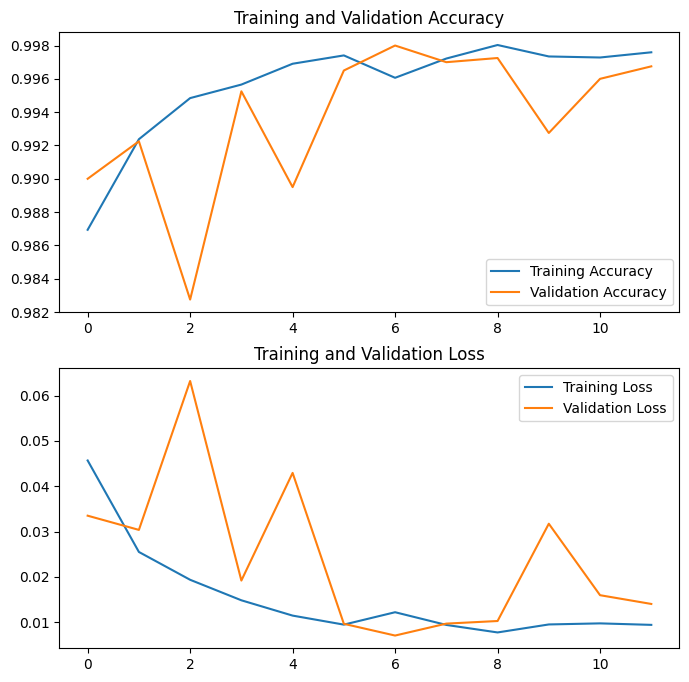

In [61]:
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [62]:
loss, accuracy = model.evaluate(test_dataset)

154/154 [==============================] - 4s 27ms/step - loss: 0.0114 - accuracy: 0.9985


1/1 [==============================] - 0s 34ms/step


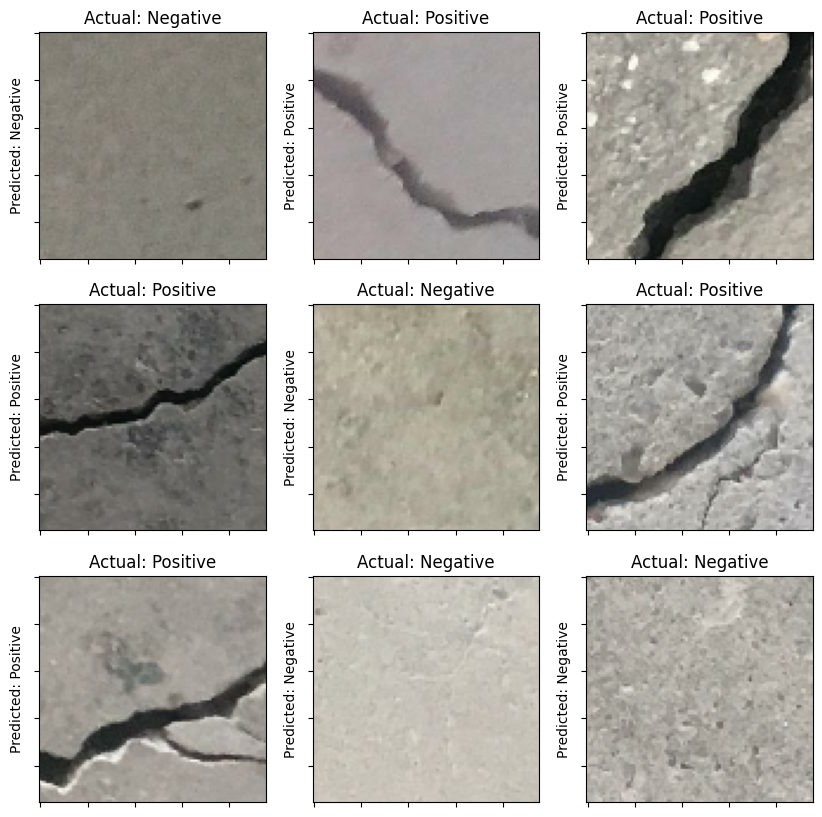

In [63]:
plt.figure(figsize=(10, 10))
for images, labels in test_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        plt.ylabel("Predicted: "+class_names[np.argmax(score)])
        plt.title("Actual: "+class_names[labels[i]])
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

# Conclusion

In this problem, we successfully addressed the problem of concrete crack image classification, where the goal was to develop a machine learning model capable of distinguishing between concrete images with cracks and those without cracks. We compared the performance of ANN and CNN models and found that CNN models outperformed ANN models. We also compared the performance of different CNN models and found that the Dense CNN model with more layers and Dropout performed the best.